<a href="https://colab.research.google.com/github/19rehan/Medical_Insurance_Cost_Predictor/blob/main/Medical_Insurance_Cost_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
# The Link: Direct raw CSV from GitHub
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

# Import directly
df = pd.read_csv(url)

# Quick check
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
#Removing Children Age less then 0
df = df[df['children']>=0].copy()

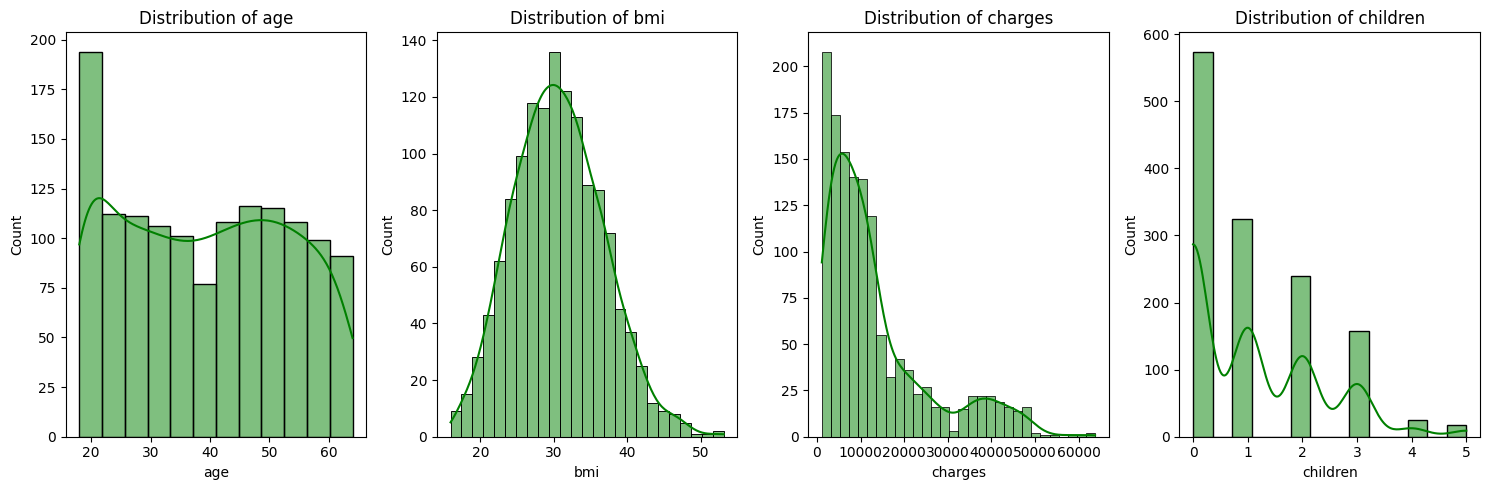

In [9]:
#Data Distribution

checking__distribution = ['age','bmi','charges','children']

plt.figure(figsize=(15,5))

for i,col in enumerate(checking__distribution):
    plt.subplot(1,4,i+1)
    sns.histplot(df[col],kde=True, color = 'green')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

In [10]:
#apply log to make #Charges and #Children Normal.

df['charges'] = np.log(df['charges'])

In [11]:
print(df['charges'].head())

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64


In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


In [13]:
# Check if any age is less than 18
young_people = df[df['age'] < 18]
print(f"Number of people below 18: {len(young_people)}")

# Agar koi mil jaye toh unhein dekhne ke liye
print(young_people)

Number of people below 18: 0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


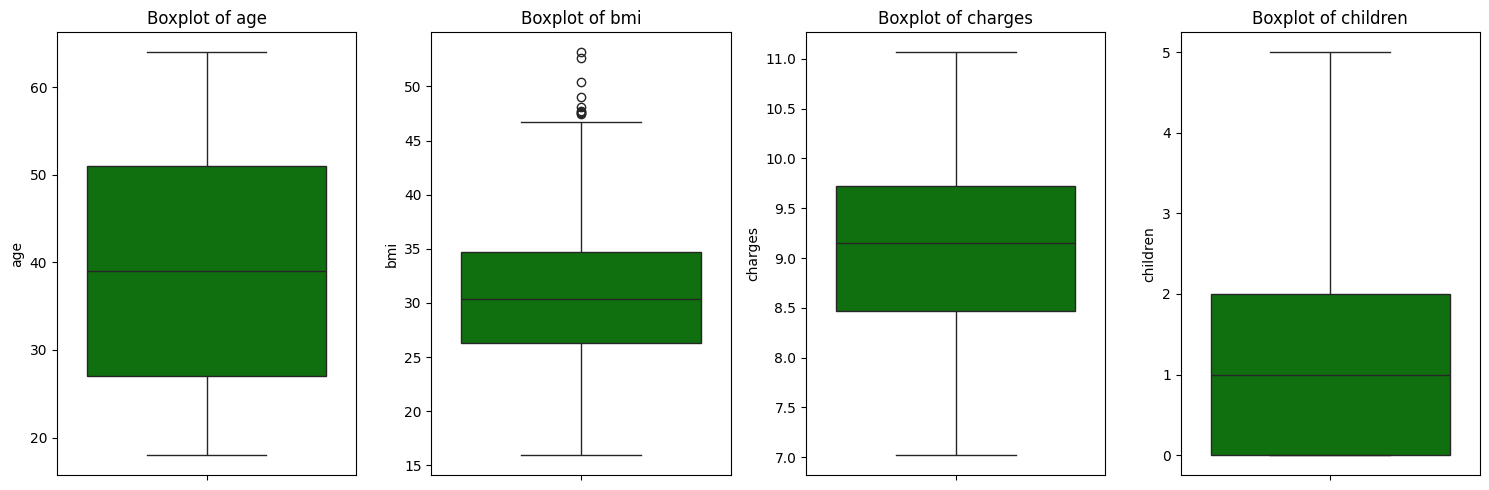

In [14]:
# Checking Outliers
checking_outliers = ['age','bmi','charges','children']

plt.figure(figsize=(15,5))

for i, col in enumerate(checking_outliers):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[col], color = 'green')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [15]:
# Check for extreme BMI values
extreme_bmi = df[df['bmi'] > 60]

print(f"Total count of BMI > 60: {len(extreme_bmi)}")
print(extreme_bmi)

Total count of BMI > 60: 0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [16]:
df_final = pd.get_dummies(df, drop_first=True)

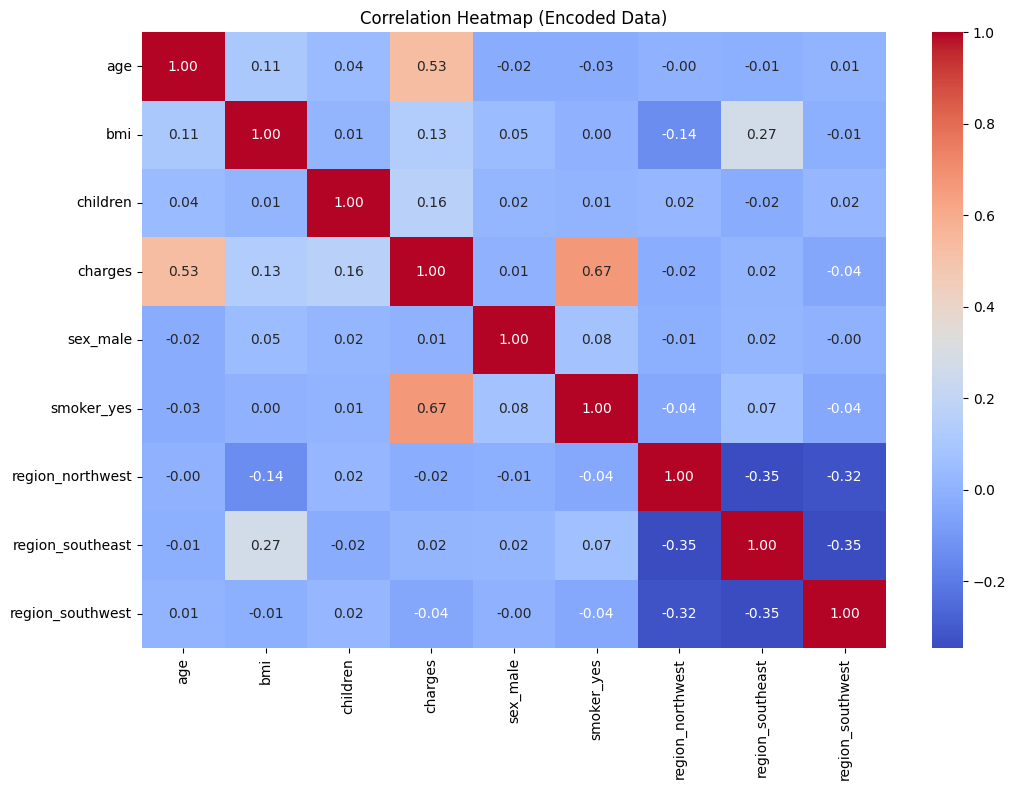

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_final.corr()

# 3. Plot the Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Encoded Data)")
plt.show()

/tmp/ipython-input-4069935100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-4069935100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-4069935100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


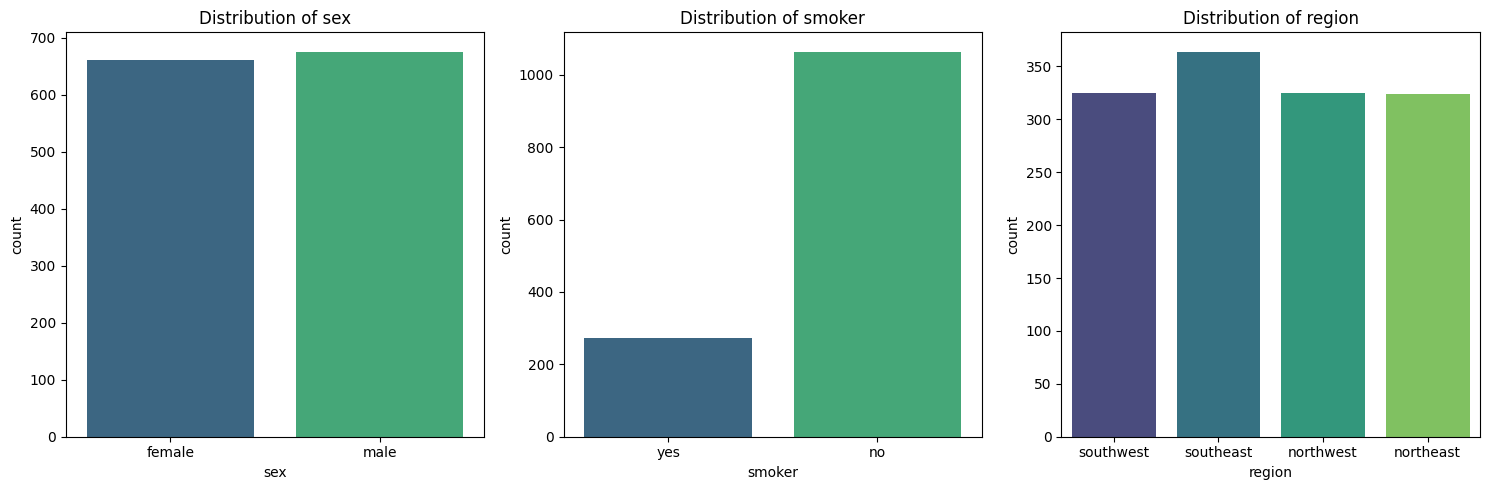

In [18]:
# List of categorical columns to check Fairness of Data
cat_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [19]:
X = df_final.drop('charges', axis=1)
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Initialize and Train the Model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


In [24]:
#Make predictions on the test set
y_pred = lr.predict(X_test)

In [28]:
#Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2): 0.8047
Mean Absolute Error (MAE): 0.2697


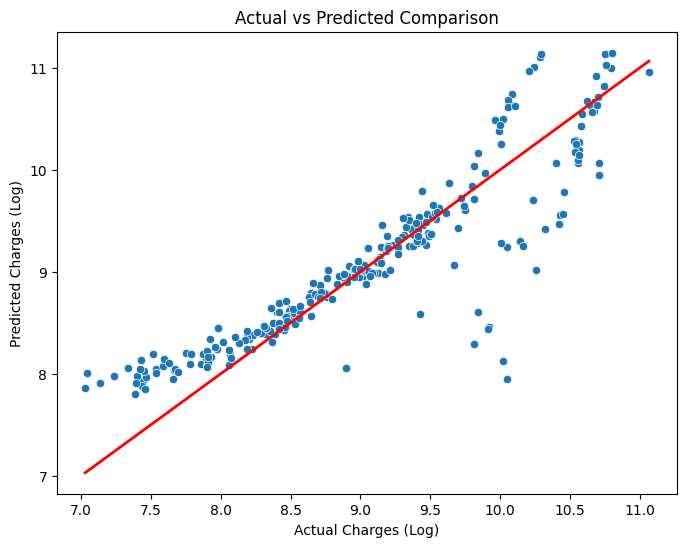

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Charges (Log)")
plt.ylabel("Predicted Charges (Log)")
plt.title("Actual vs Predicted Comparison")
plt.show()

In [31]:
# Create a DataFrame to compare results
results = pd.DataFrame({  'Actual_Log': y_test,'Predicted_Log': y_pred})

# Reverse the Log transformation using Exponential
results['Actual_Dollars'] = np.exp(results['Actual_Log'])
results['Predicted_Dollars'] = np.exp(results['Predicted_Log'])

# Show the first 10 rows
print(results[['Actual_Dollars', 'Predicted_Dollars']].sample(10))

     Actual_Dollars  Predicted_Dollars
438     12592.53450       17836.665173
670      4837.58230        5270.710802
410      1621.34020        2450.162998
850     37270.15120       29250.952787
629     42983.45850       39264.742802
29      38711.00000       25368.258595
930      2927.06470        4682.072171
113      2404.73380        3622.106749
261     17085.26760       14828.271204
708      6113.23105        6634.006691
